# <span style='color:#DB822E'>Activity 21: Image Recognition Using Deep Learning</span>
## Access Point or Switch?

In this activity we'll build our own custom deep learning image classifier to compare images of Aruba devices and determine if the picture is an AP or switch. We'll use a collection of Aruba images from the web. We'll then load those images into a pipeline and use it to classify images as a zero or one binary classification type problem. 

We'll be using [Tensorflow](https://www.tensorflow.org/), specifically the [Keras API](https://www.tensorflow.org/guide/keras) within Tensorflow to build this deep learning classifier.

- `TensorFlow` is an end-to-end open-source platform for machine learning. TensorFlow is a rich system for managing all aspects of a machine learning system; however, this class focuses on using a particular TensorFlow API to develop and train machine learning models.

- `Keras` (developed by Google)is the high-level API of the TensorFlow platform. It provides an approachable, highly productive interface for solving machine learning (ML) problems, with a focus on modern deep learning. Keras covers every step of the machine learning workflow, from data processing to hyperparameter tuning to deployment.


## Step 1 - Establish the Environment
Once again, we will setup the lab environment by importing and loading some the libraries required for running the models in this lab.

- `matplotlib` - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Let's get started.  Run the code block. 👇🏽
***

In [2]:
from IPython.display import display
from IPython.display import Image, display, Markdown
import logging
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

logging.getLogger().setLevel(logging.CRITICAL)


display(Markdown('<span style="color: #14B326">Done!</span>'))


<span style="color: #14B326">Done!</span>

***

## Step 2 - Load the Dataset with Keras API


The Keras sequential API utility to load the images from our data directory. This will make it easier to build our custom deep learning module over Tensorflows dataset utility. 

The interesting thing about this step is that the concept of GPU comes into playnand we did not talk about this much in the workshop.
 - **G**raphics **P**rocessing **U**nit (GPU) is a specialized electronic circuit designed to rapidly manipulate and display images. GPUs are used in a wide range of applications, including video games, video editing, scientific computing and AI.  GPUs are well-suited for deep learning because they have many cores that can be used to perform parallel computations. This means that GPUs can process multiple pieces of data at the same time, which can significantly speed up the training process.

Deep Learning models are much more of a resource drain than machine learning.  In this code, you are  initializing a MirroredStrategy and loading a dataset of images from the data directory.

`tf.distribute.MirroredStrategy()` creates a strategy that replicates the model and data across all available GPUs. This allows you to train your model on multiple GPUs in parallel, which can significantly speed up training.  In short, in the world of AI, GPU's and things like mirrored strategies are critical to ensure performance.

Let's Run it! 👇🏽

In [3]:
### Uncomment the following if running your own server that has a GPU.
### The following will prevent tensorflow use ALL of your GPU
### or you'll get out of memory errors with other applications
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

strategy = tf.distribute.MirroredStrategy()


data = tf.keras.utils.image_dataset_from_directory(
    directory="data"
    )

display(Markdown('<span style="color: #14B326">Done!</span>'))


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


2023-10-17 18:11:28.181183: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 287 files belonging to 2 classes.


<span style="color: #14B326">Done!</span>


## Step 3 - Data Iterator
A NumPy data iterator is an object that provides a way to iterate over the elements of a NumPy array in a systematic way. Iterators are useful for performing a variety of operations on NumPy arrays, such as:

- Applying a function to each element of an array
- Performing element-wise arithmetic on two arrays
- Finding the minimum and maximum values in an array
- Sorting an array
- Creating a new array from a subset of the elements of an existing array


This code provides a simple but efficient way to load batches of data for machine learning applications for training a neural network. The following will load the dataset into numpy and cycle through the shapes using the Python generator, next().

**🔻🔻 <span style='color:red'>WARNING!! The following 👇 may generate an error. The error can be ignored.</span> 🔻🔻**

In [4]:
data_iterator = data.as_numpy_iterator()  # type: ignore
batch = data_iterator.next()

display(Markdown('<span style="color: #14B326">Done!</span>'))


<span style="color: #14B326">Done!</span>


***


## Step 4 -  Print the Batch

Prints the shape and values of the first batch of data, which contains access points and switches.

Index 0 or shape, is the image data
Index 1 is the label

32 is the batch (default)
256, 256 is auto resizing it to 256x256 px
3 is RGB (red green blue)

In [5]:
# Print the batch 
# 0 is access points
# 1 is switches

display(batch[0].shape)
display(batch[1])

display(Markdown('<span style="color: #14B326">Done!</span>'))


(32, 256, 256, 3)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int32)

<span style="color: #14B326">Done!</span>

***

## Step 5 - Visualize the Data

This code is a useful way to visualize the batches of access points and switches in the dataset. This can be helpful for debugging purposes or for understanding the data that is being processed. Here we'll display some of the data so we can see if it looks correct.

`fig, ax = plt.subplots(ncols=4, figsize=(20, 20))`
- `ncols` is the number of columns
- `figsize` is the figure size, so 20x20 to fit on our screen

```
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(np.uint8))
    ax[idx].title.set_text(batch[1][idx])
```

- `:4` says to show 4 images.
- `imshow` is the image
- `title` is the title of the image, which is 0 or 1

AP is equal to 0 and switch is equalt to 1 because of how the directories or were imported. APs were first, then switches.

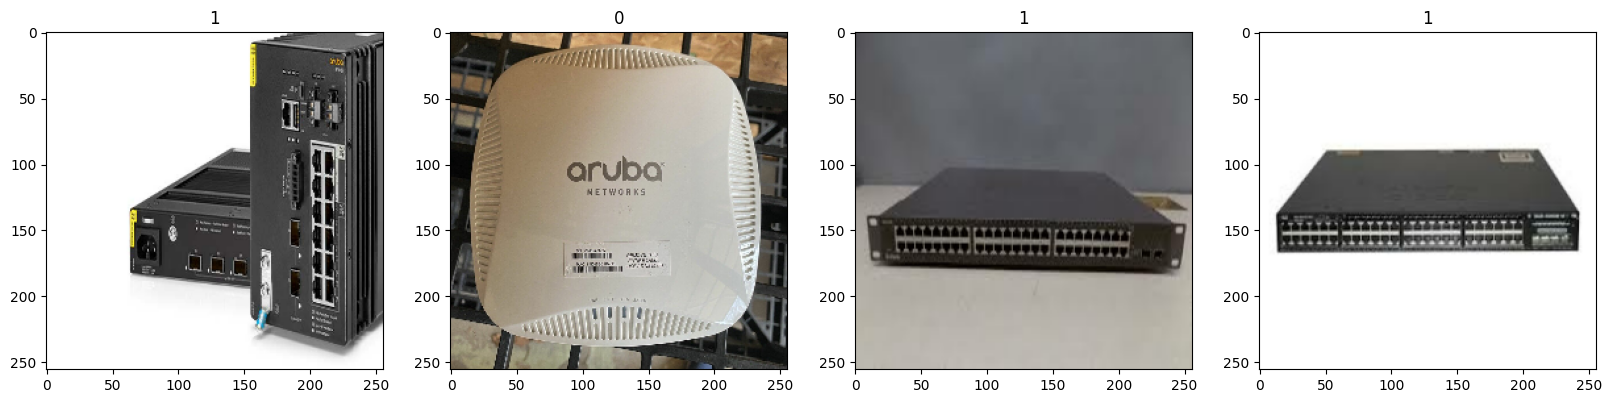

<span style="color: #14B326">Done!</span>

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(np.uint8))
    ax[idx].title.set_text(batch[1][idx])

plt.show()

display(Markdown('<span style="color: #14B326">Done!  Onward.  Step 6  next.</span>'))


***

## Step 6 - Scale the Data to Improve Performance
We then need to scale the data to 255 colors. Each channel (R,G,B) have 256 colors, but we start at 0, which is why we're at 255.

This code scales the data NumPy array by dividing each value by 255. This is a common data preprocessing technique for machine learning applications, as it helps to normalize the data and improve the performance of the model.  Let's givie it a try 👇🏿

In [13]:


data = data.map(lambda x, y: (x/255, y))  # type: ignore
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

display(Markdown('<span style="color: #14B326">Done! Step 7 next.</span>'))


<span style="color: #14B326">Done! Step 7 next.</span>

***

## Step 7 - Display Scaled Data

Just as in Step 5, will display some of our data.  Visualizing data is helpful for debugging purposes or for understanding the data that is being processed. Let's run the code and take a look. 👇🏿

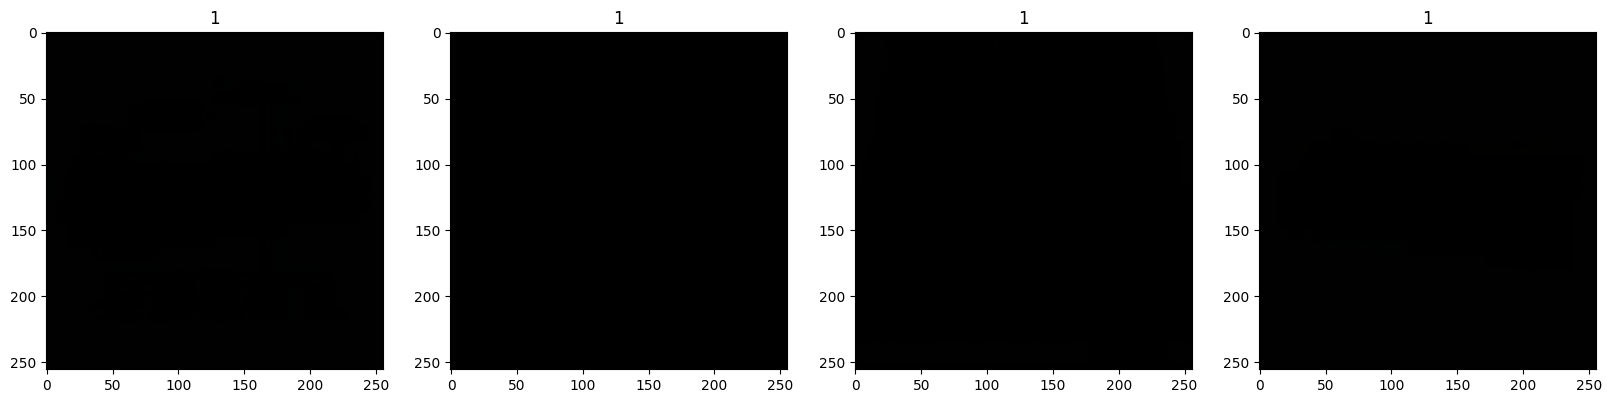

<span style="color: #14B326">Done! Step 8 next.</span>

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

plt.show()

display(Markdown('<span style="color: #14B326">Done! Step 8 next.</span>'))


***

## Step 8 - Split Dataset 3 Ways (Training, Validation & Test Data)

As in previous activities this step will split the data. The dataset is split into three subsets: train, validation, and test. The train subset is used to train the model, the validation subset is used to evaluate the model during training, and the test subset is used to evaluate the model after training is complete.

The code first calculates the size of each subset by multiplying the total size of the dataset by the desired percentage. The train subset is then created by taking the first train_size elements of the dataset. The validation subset is created by skipping the first train_size elements of the dataset and then taking the next val_size elements. The test subset is created by skipping the first train_size and val_size elements of the dataset and then taking the next test_size elements.

Let's run the code 👇.

In [20]:
# print(len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

# print(train_size+val_size+test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

display(Markdown('<span style="color: #14B326">Done! On to step 9.</span>'))


<span style="color: #14B326">Done! On to step 9.</span>

***


## Step 9 - Building Deep Learning Model

This code creates a simple convolutional neural network (CNN) model for image classification.  Once the model is trained, you can use it to predict the class of new images.

CNNs are a powerful tool for image classification, and they have been shown to achieve state-of-the-art results on many benchmark datasets. This is a simple example of a CNN model, and it can be used as a starting point for building more complex models.


In [10]:

from tensorflow.keras.layers import (Conv2D, Dense, Flatten, MaxPooling2D)
from tensorflow.keras.models import Sequential  # type: ignore



model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

display(Markdown('<span style="color: #14B326">Done! Onward! Step 10 next</span>'))


<span style="color: #14B326">Done!</span>

In [11]:
# Print the model
print(model.summary())

display(Markdown('<span style="color: #14B326">Done!</span>'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

<span style="color: #14B326">Done!</span>

***

## Step 10 Training the Model

This code does the following:

1. Defines a log directory called logs where TensorBoard will save its logs.
2. Creates a TensorBoard callback that will log the model's performance to the logs directory.
3. Sets the device to the first GPU.
4. Trains the model on the train dataset for 20 epochs, with the val dataset used for validation.
5. Uses the TensorBoard callback to log the model's performance during training.

The `with tf.device(f'/GPU:0'):` block ensures that the model is trained on the first GPU. This can improve the training speed significantly, especially for large and complex models.

The TensorBoard callback is a powerful tool for visualizing the model's performance during training. It allows you to track the model's loss and accuracy on the training and validation datasets, as well as other metrics such as the training time and the weights of the model's layers.

**🔻🔻 <span style='color:red'>WARNING!! This step can take 2 minutes or more.</span> 🔻🔻**

In [21]:

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

with tf.device(f'/GPU:0'):
    hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

display(Markdown('<span style="color: #14B326">Done! Step 11 is next.</span>'))


Epoch 1/20
6/6 [==============================] - 14s 819ms/step - loss: 0.6289 - accuracy: 0.6510 - val_loss: 0.6818 - val_accuracy: 0.7031
Epoch 2/20
6/6 [==============================] - 5s 753ms/step - loss: 0.6100 - accuracy: 0.7188 - val_loss: 0.5302 - val_accuracy: 0.8281
Epoch 3/20
6/6 [==============================] - 5s 767ms/step - loss: 0.6038 - accuracy: 0.7240 - val_loss: 0.5759 - val_accuracy: 0.7500
Epoch 4/20
6/6 [==============================] - 5s 761ms/step - loss: 0.5877 - accuracy: 0.7240 - val_loss: 0.6509 - val_accuracy: 0.6875
Epoch 5/20
6/6 [==============================] - 5s 735ms/step - loss: 0.6144 - accuracy: 0.7031 - val_loss: 0.6196 - val_accuracy: 0.6875
Epoch 6/20
6/6 [==============================] - 5s 723ms/step - loss: 0.5850 - accuracy: 0.7396 - val_loss: 0.6552 - val_accuracy: 0.6406
Epoch 7/20
6/6 [==============================] - 5s 761ms/step - loss: 0.5810 - accuracy: 0.7292 - val_loss: 0.6290 - val_accuracy: 0.6875
Epoch 8/20
6/6 [===

<span style="color: #14B326">Done!</span>

***

## Step 11 - Plotting the Performance
The goal of this step is to gain valuable insights into the performance of the model and make informed decisions about how to train and evaluate the model.

Let's introduce some new terminology not covered during the workshop.

- **`overfitting`** is a phenomenon that occurs when a machine learning model learns the training data too well and is unable to generalize to new data. This can happen when the model is too complex or when the training data is too small.
  
- **`underfitting`** is a phenomenon that occurs when a machine learning model is not complex enough to learn the underlying patterns in the training data. This can happen when the model is too simple or when the training data is too complex.

### 11a. Loss
The loss curves can be used to diagnose problems with the model and to determine when to stop training the model. For example, if the training loss curve decreases over time but the validation loss curve does not, this may indicate that the model is overfitting to the training data.

Let's try step 11a. 👇🏿

In [ ]:

##
# Loss
#
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

display(Markdown('<span style="color: #14B326">WellDone!</span>'))


***

### 11b. Accuracy

This code plots the training and validation accuracy curves for the model. The training accuracy curve shows how the accuracy on the training data increases over time as the model is trained. The validation accuracy curve shows how the accuracy on the validation data changes over time.  You can use the training and validation accuracy curves to determine when to stop training the model. A common rule of thumb is to stop training the model when the validation accuracy curve starts to plateau. This means that the validation accuracy is no longer improving, even though you are continuing to train the model.

**By monitoring the training and validation accuracy curves, you can train a model that is able to generalize well to new data.**

Try it now 👇🏿

In [ ]:
##
# Accuracy
#
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

display(Markdown('<span style="color: #14B326">Done! Onward.</span>'))


***

### 11c. Evaluate Model

Evaluates the performance of the model on the test dataset.  By evaluating the performance of the model on the test dataset, you can get a sense of how well the model is likely to perform on new data.

Give it a whirl 👇

In [ ]:
####
# Evaluate Model
#
# from tensorflow.keras.metrics import BinaryAccuracy  # type: ignore
# from tensorflow.keras.metrics import Precision, Recall

# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

# for batch in test.as_numpy_iterator():
#     X, y = batch
#     yhat = model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

# print(pre.result(), re.result(), acc.result())

display(Markdown('<span style="color: #14B326">Done! Keep moving almost there.</span>'))


***

## Step 12 - Testing the Model

This code will test the model on any test image. This can help you to assess the performance of the model on real-world data.

1. The code first reads the test image using the `cv2.imread()` function.
2. The code then resizes the image to 256x256 using the `tf.image.resize()` function.
3. The code then displays the resized image using the `plt.imshow()` function.
4. The code then predicts the class of the image using the `model.predict()` function.
5. The `np.expand_dims()` function is used to add an extra dimension to the image, so that it can be passed to the `model.predict()` function.
6. The `model.predict()` function returns a probability that the image belongs to the positive class.
7. The code then checks if the probability is greater than 0.5.
9. If it is, then the code displays a message that the predicted class of the image is a switch. Otherwise, the code displays a message that the predicted class of the image is an access point.

Go for it 👇

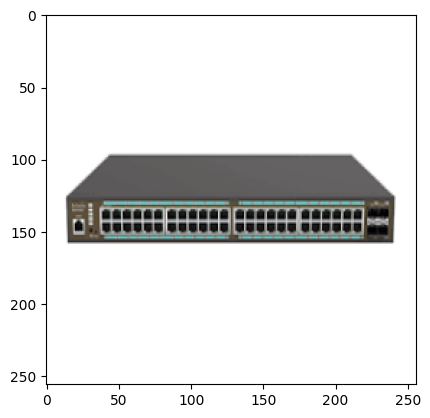

1/1 [==============================] - 0s 29ms/step


'Predicted class of image is an Access Point'

<span style="color: #14B326">Done!</span>

In [28]:
####
# Test Model
#
import cv2

img = cv2.imread('test_images/test_switch-1.png')
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))  # type: ignore
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))  # type: ignore

if yhat > 0.5:
    display('Predicted class of image is a Switch')
else:
    display('Predicted class of image is an Access Point')
    
display(Markdown('<span style="color: #14B326">Done! Woohooo!</span>'))


## Step 13 - Save the Model

Saves the model to a file called imageclassifier.keras in the models directory.  Saving the model is a good practice, as it allows you to reload the model at a later time or share it with others. Do it👇

In [29]:
####
# Save Model
#
import os
model.save(os.path.join('models', 'imageclassifier.keras'))

display(Markdown('<span style="color: #14B326">Done! YESSSSS 💪🏽💪🏽💪🏽💪🏽 Activity 21 is done!!!</span>'))


<span style="color: #14B326">Done! YESSSSS 💪🏽💪🏽💪🏽💪🏽 Activity 21 is done!!!</span>

## You have completed Activity 21.

[Start Activity 22](Activity22.ipynb)